In [1]:
from architecture import pipe
from PIL import Image
from dataloader import testing_dataset
from util import util
from torch.utils.data import DataLoader
import torch
from torch.nn import BCELoss

D:\ml\mtest\learn_env\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
D:\ml\mtest\learn_env\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
D:\ml\mtest\learn_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
state = torch.load('./saves/exp_5/model_epoch_3.pth')

In [3]:
pipe.model.load_state_dict(state['model_state_dict'])
pipe.model = pipe.model.eval()

In [4]:
dataset = DataLoader(testing_dataset, shuffle=True)

In [55]:
sample = next(iter(dataset))

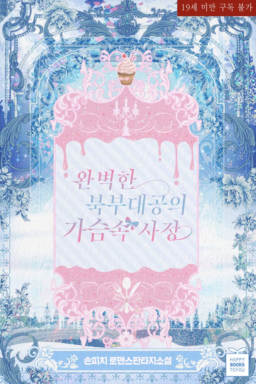

In [56]:
util.to_pil(sample[0][0])

In [57]:
print(sample[1])
util.to_classes(sample[1])

tensor([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')


(['comedy', 'adult', 'fantasy', 'romance'], [1.0, 1.0, 1.0, 1.0])

In [58]:
res = pipe.pipe(sample[0])
res

tensor([[0.6665, 0.4846, 0.5391, 0.2988, 0.6367, 0.6143, 0.4224, 0.2703, 0.4241,
         0.4490, 0.3823, 0.6465, 0.2776, 0.5293, 0.4417, 0.3350, 0.4255, 0.4963,
         0.4990, 0.4492, 0.4011, 0.2573, 0.5347, 0.4612, 0.3032, 0.4573]],
       device='cuda:0', dtype=torch.float16, grad_fn=<SigmoidBackward0>)

In [59]:
util.pick_top(res[0], 6, prettify=True)

(['action', 'martial arts', 'drama', 'ecchi', 'adventure', 'slice of life'],
 [0.66650390625,
  0.646484375,
  0.63671875,
  0.6142578125,
  0.5390625,
  0.53466796875])

In [61]:
util.calculate_precession(res, sample[1], cutoff=.5)

tensor([-1.7500])